KNN and Gradient Boosting

# Data Cleaning & Preparation

The dataset was processed, cleaned, and analyzed utilizing a variety of libraries, methods, and functions. Seeing how KNN performs

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset
df = pd.read_csv("/content/water_potability.csv")

In [ ]:
# convert all columns to lowercase
df.columns = df.columns.str.lower()

**Info insight:** All datatypes are correct. Features are all float numeric and potability is set as integer. Note: there are some null values in the ph, sulfate, & the trihalomethanes columns as a complete column should have 3276 records.

In [ ]:
# duplicated values: None
df.duplicated().sum()

0

In [ ]:
# cardinality assessment: lots of unique values since these are float types
# potability column is correct to only have 2 unique types (0=not potable; 1=potable)
df.nunique()

ph                 2785
hardness           3276
solids             3276
chloramines        3276
sulfate            2495
conductivity       3276
organic_carbon     3276
trihalomethanes    3114
turbidity          3276
potability            2
dtype: int64

In [ ]:
# count of missing values
print(df.isna().sum())
print(df.isna().sum()/df.shape[0]*100)

ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
dtype: int64
ph                 14.987790
hardness            0.000000
solids              0.000000
chloramines         0.000000
sulfate            23.840049
conductivity        0.000000
organic_carbon      0.000000
trihalomethanes     4.945055
turbidity           0.000000
potability          0.000000
dtype: float64


**Missing values:** Sulfate has the most missing values at 781 (23.84%), followed by ph at 491 (14.99%), and trihalomethanes at 162 (4.95%).

In [ ]:
# use KNN to impute missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputed = imputer.fit_transform(df[['ph','sulfate','trihalomethanes']])
imputed

array([[  6.74664184, 368.51644135,  86.99097046],
       [  3.71608008, 334.50649523,  56.32907628],
       [  8.09912419, 321.76809734,  66.42009251],
       ...,
       [  9.41951032, 308.6805907 ,  69.84540029],
       [  5.12676292, 310.98472285,  77.4882131 ],
       [  7.87467136, 337.11816286,  78.69844633]])

In [ ]:
# replace missing values with new data
df[['ph','sulfate','trihalomethanes']] = imputed
df.isna().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

**Result after imputation:** No more missing values; imputted with KNNImputer.

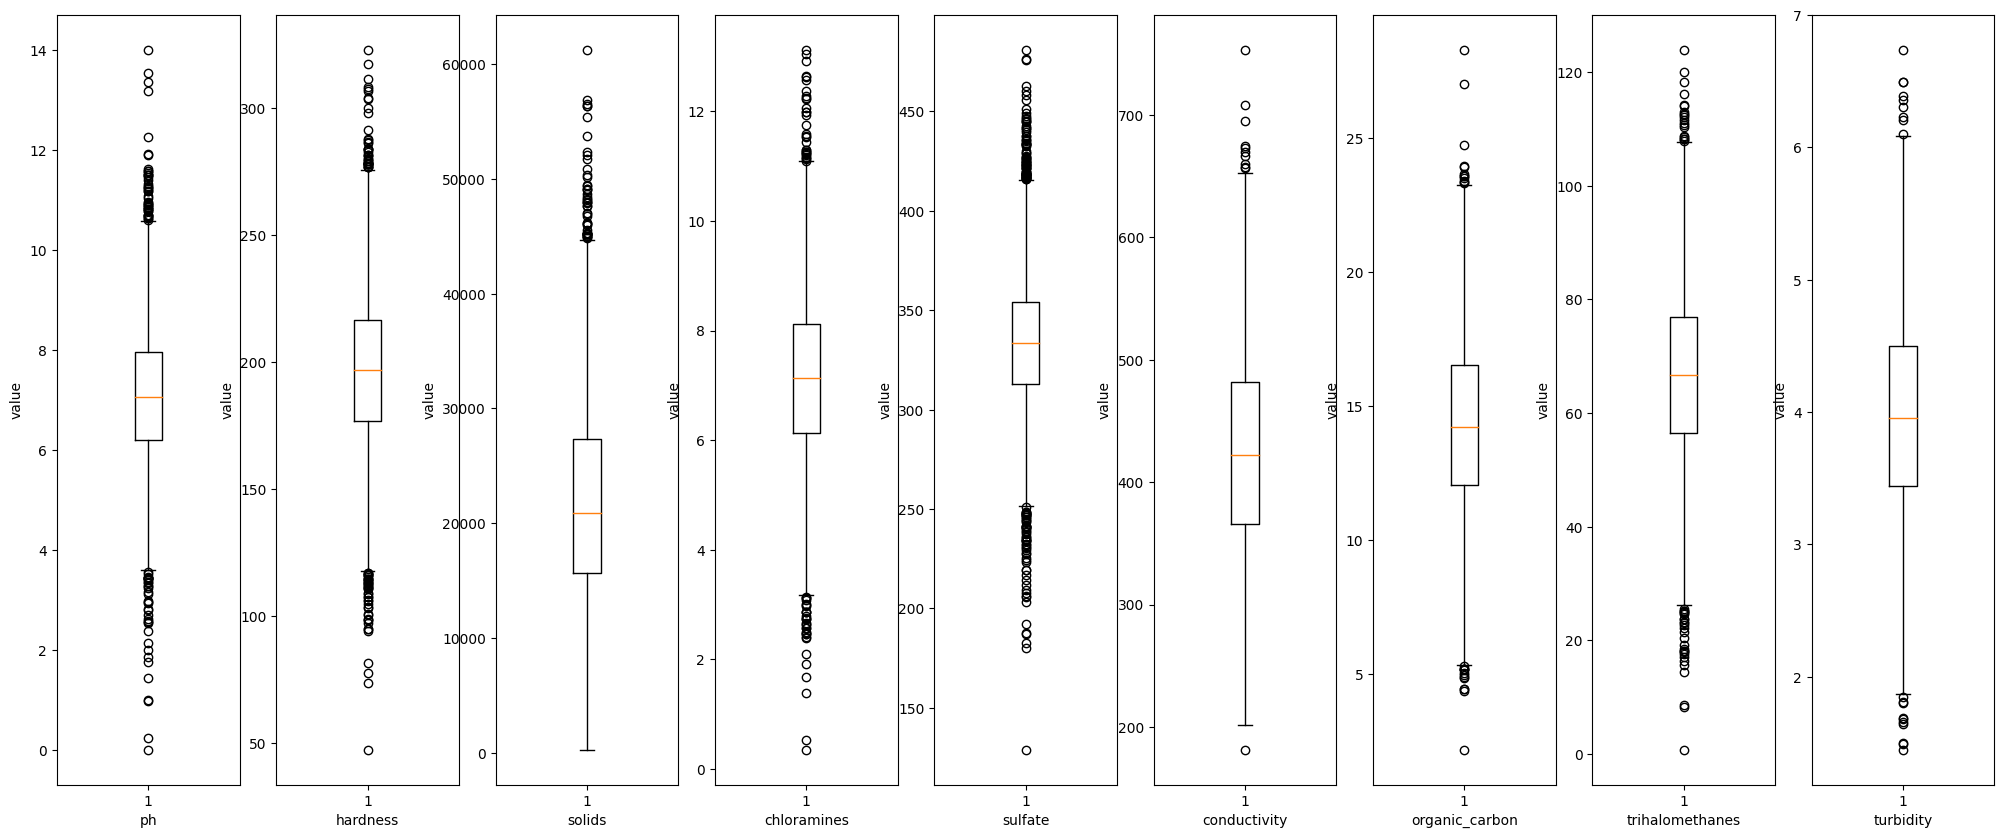

In [ ]:
# outliers boxplot
plt.figure(figsize=(25,10))

features = df.columns[:-1]

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    plt.boxplot(x)
    plt.xlabel(col)
    plt.ylabel('value')

**Boxplot Insight:** There are outliers in the dataset for all the features. All outliers are kept as they are presumed to be true values.

# Exploratory Data Analysis

In [ ]:
# descriptive statistics to spot any potential anomolies
df.describe()

ph     hardness        solids  chloramines      sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.079893   196.369496  22014.092526     7.122277   333.828804   
std       1.496123    32.879761   8768.570828     1.583085    37.156100   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.190856   176.850538  15666.690297     6.127421   312.820066   
50%       7.052451   196.967627  20927.833607     7.130299   333.673348   
75%       7.949103   216.667456  27332.762127     8.114887   353.991459   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       conductivity  organic_carbon  trihalomethanes    turbidity   potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.463416     3.966786     0.390110  
std       80.824064        3.308162        15.835029     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.463977     3.439711     0.000000  
50%      421.884968       14.218338        66.660416     3.955028     0.000000  
75%      481.792304       16.557652        76.995317     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

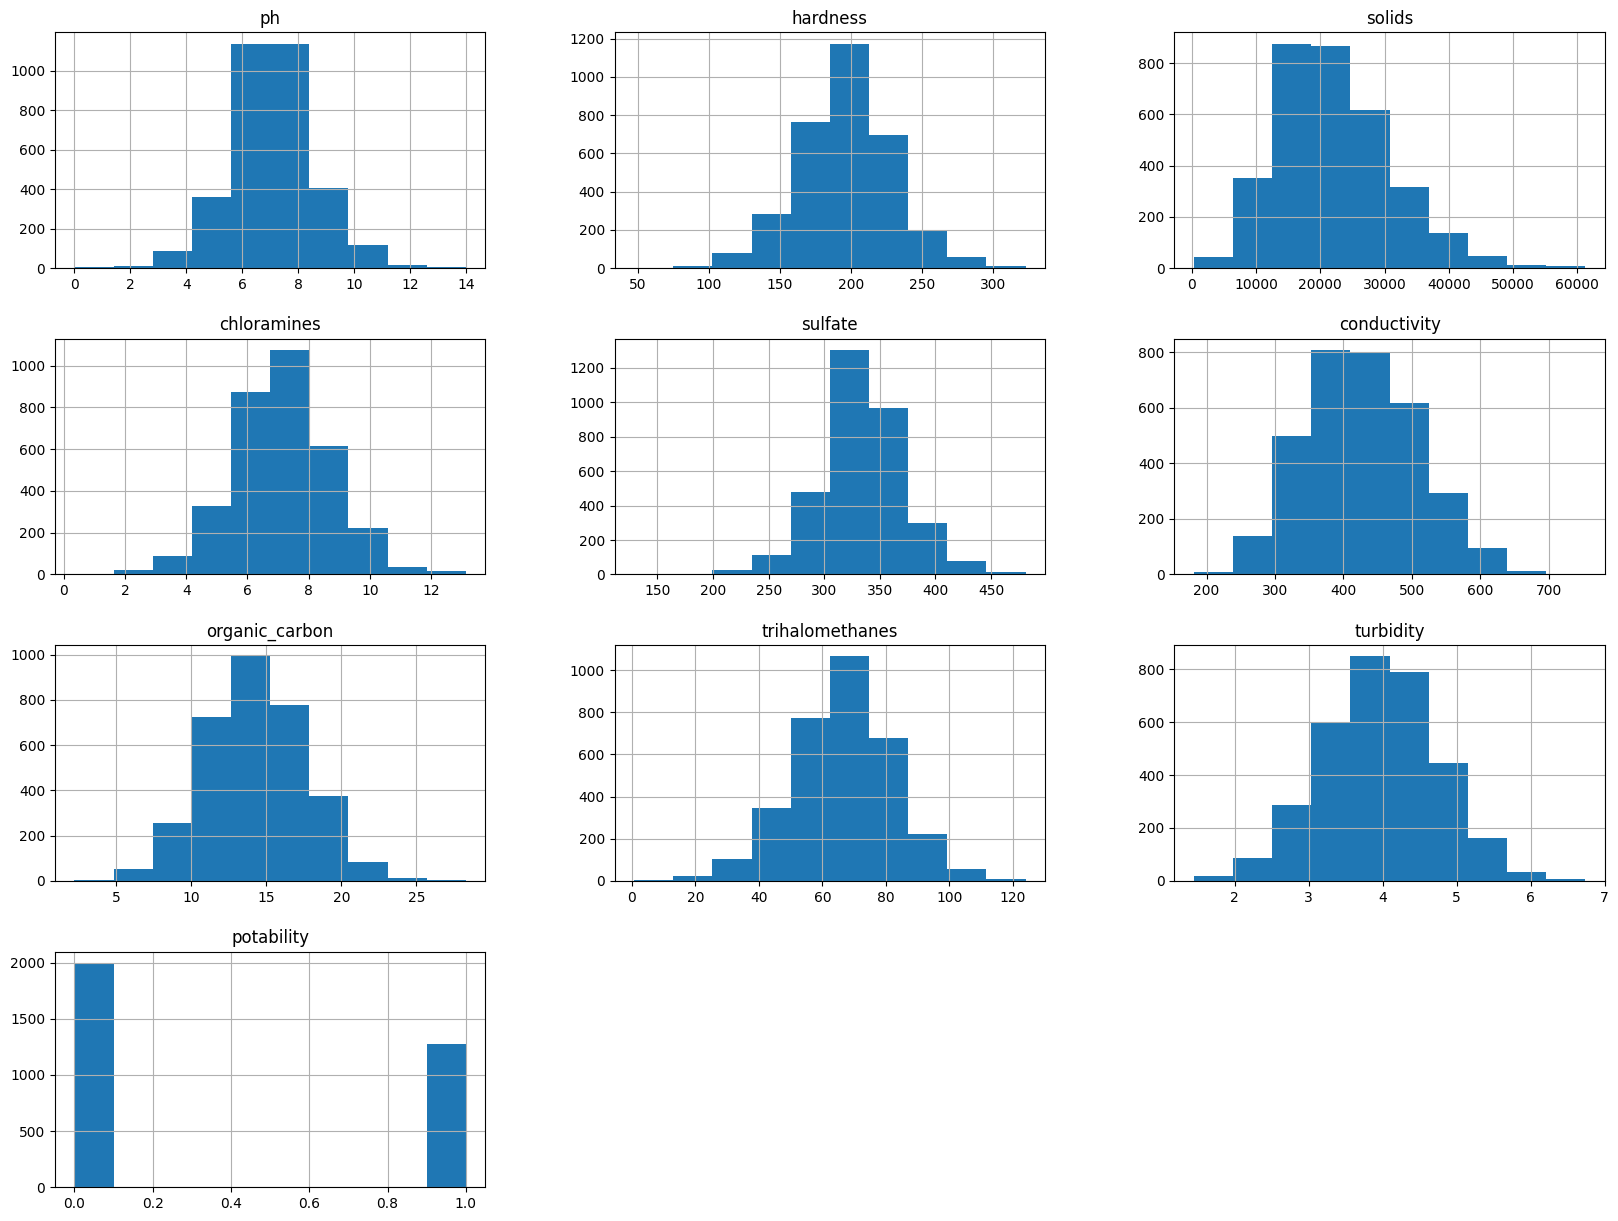

In [ ]:
# histograms of all columns
df.hist(figsize=(20,15))
plt.show()

In [ ]:
# skew of features
df.skew().round(2)[:-1]

ph                 0.03
hardness          -0.04
solids             0.62
chloramines       -0.01
sulfate           -0.04
conductivity       0.26
organic_carbon     0.03
trihalomethanes   -0.09
turbidity         -0.01
dtype: float64

In [ ]:
print(f'Median for solids: {np.median(df["solids"]).round()}')

Median for solids: 20928.0


**Histogram & Skew Analysis:** All of the features except one are approximately normally distributed with skews close to 0. The least normally distributed column is solids with a moderate skew of 0.62, which means the median would be a better measure of central tendency. The median for solids is 20,928.

Text(0.5, 1.0, 'Pairplot of Water Potability Dataset')

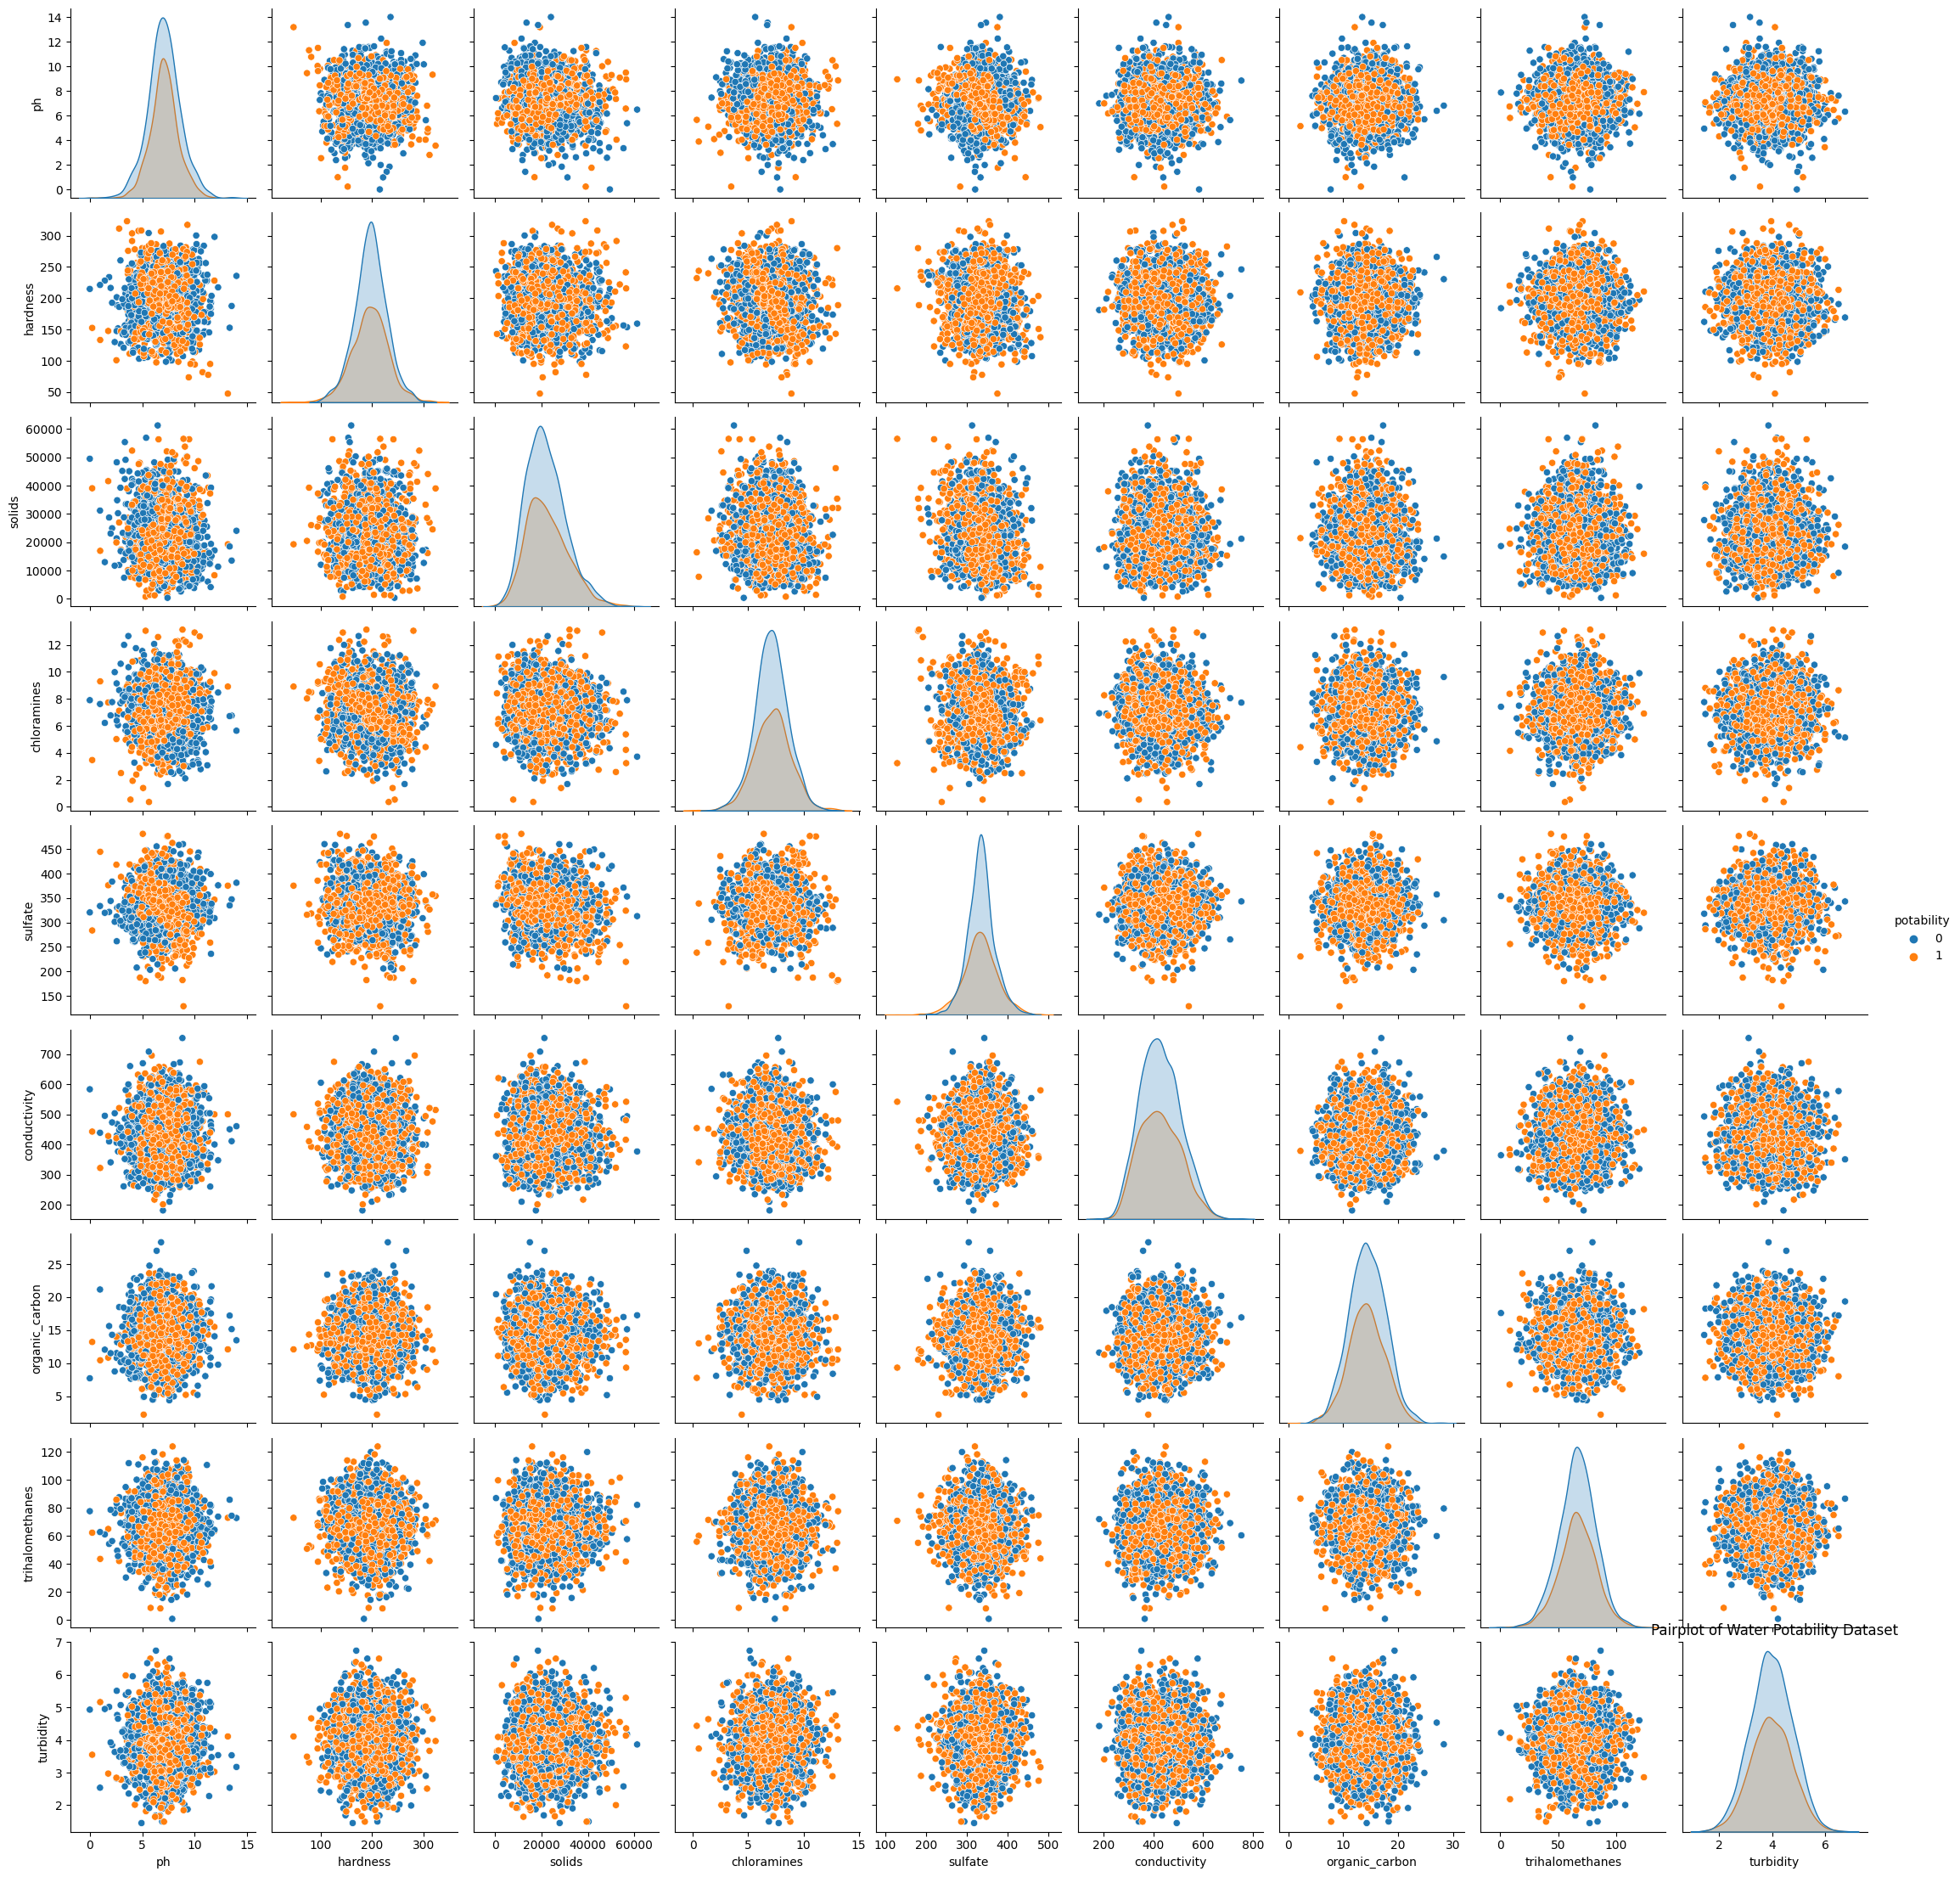

In [ ]:
# pairplot of entire dataframe
sns.pairplot(df, hue='potability')
plt.title("Pairplot of Water Potability Dataset")

In [ ]:
# correlation of features to target
cor = df.corr()['potability'].round(4)[:-1]
cor.sort_values()[::-1]

solids             0.0337
chloramines        0.0238
trihalomethanes    0.0064
ph                 0.0026
turbidity          0.0016
conductivity      -0.0081
hardness          -0.0138
sulfate           -0.0236
organic_carbon    -0.0300
Name: potability, dtype: float64

**Correlations Insight:** The features have very weak correlations to the target. Solids has the highest positive correlation to the target of potability at 0.03. Organic carbon has the highest negative correlation to potability at -0.03. Features with the smallest correlation include ph and turbidity.

Text(0.5, 1.0, 'Correlation of Features to Target')

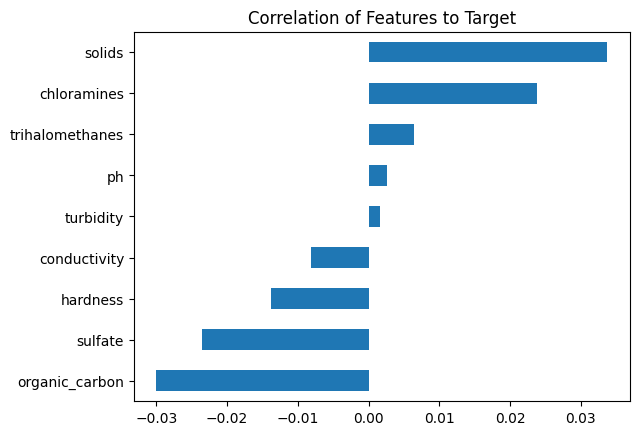

In [ ]:
# barplot of pearson correlation with the target column
df.corr().loc['potability'][:-1].sort_values().plot.barh()
plt.title("Correlation of Features to Target")

In [ ]:
# statistical significance of features using a pvalue of less than 0.05
from scipy.stats import pearsonr
for c in df.columns[:-1]:
    correlation, pvalue = pearsonr(df[c], df['potability'])
    print(f'alpha of 0.05, {c : <18}: {correlation : .2f}, significant: {pvalue < 0.05}')

alpha of 0.05, ph                :  0.00, significant: False
alpha of 0.05, hardness          : -0.01, significant: False
alpha of 0.05, solids            :  0.03, significant: False
alpha of 0.05, chloramines       :  0.02, significant: False
alpha of 0.05, sulfate           : -0.02, significant: False
alpha of 0.05, conductivity      : -0.01, significant: False
alpha of 0.05, organic_carbon    : -0.03, significant: False
alpha of 0.05, trihalomethanes   :  0.01, significant: False
alpha of 0.05, turbidity         :  0.00, significant: False


**Correlation, P-Values Analysis:** The p-values for all the features are not statistically significant and align with the weak correlations plotted in the heatmap and barplot. However, all the features will be used to build the models as together they play a role in determining water potability.

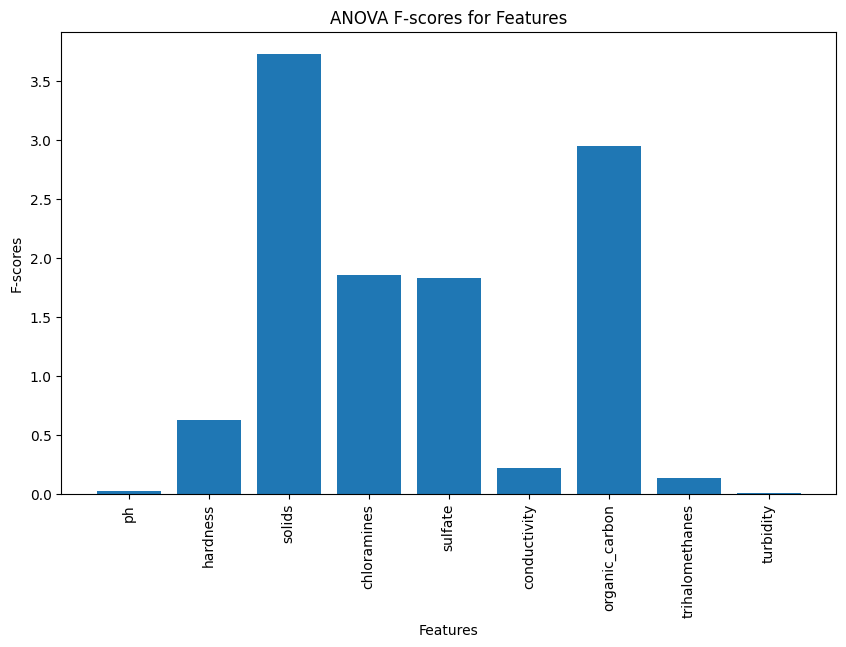

In [ ]:
# bar chart of F-scores

# seperate features & targets
features = df.drop('potability', axis=1)
target = df['potability']

# import f_classif
from sklearn.feature_selection import f_classif
f_scores, p_values = f_classif(features, target)

# visualize f-scores
plt.figure(figsize=(10, 6))
plt.bar(features.select_dtypes(include=np.number).columns, f_scores)
plt.title('ANOVA F-scores for Features')
plt.xlabel('Features')
plt.ylabel('F-scores')
plt.xticks(rotation=90)
plt.show()

**F-Score analysis:** Solids and organic_carbon have the highest F-scores, which aligns with the finding of the highest correlated variables to the target as well.

#### Analysis of Over Recommended Safe Water Drinking Thresholds for Solids & Organic Carbon

In [ ]:
# potability over solids
over_solids = df[df['solids'] > 1000]

potability
0    1997
1    1277
Name: count, dtype: int64 3274


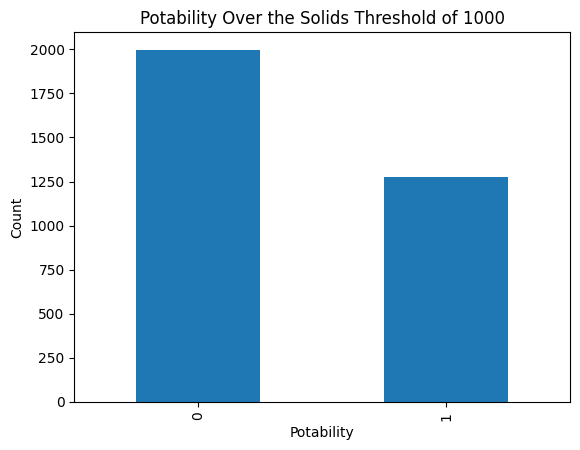

In [ ]:
# potability over solids chart
over_solids['potability'].value_counts().plot.bar()
plt.title("Potability Over the Solids Threshold of 1000")
plt.xlabel("Potability")
plt.ylabel("Count")
print(over_solids["potability"].value_counts(), over_solids.shape[0])

**Solids Over Threshold Analysis:** In terms of solids, about 99% of the data points (3,274 records) exceed the safety threshold of 1,000 mg/L. Out of those, about 61% are not potable/safe and 39% are potable/safe.

In [ ]:
# records below/above organic carbon thresholds
over_oc = df[(df['organic_carbon'] > 4) | (df['organic_carbon'] < 2)]

potability
0    1998
1    1277
Name: count, dtype: int64 3275


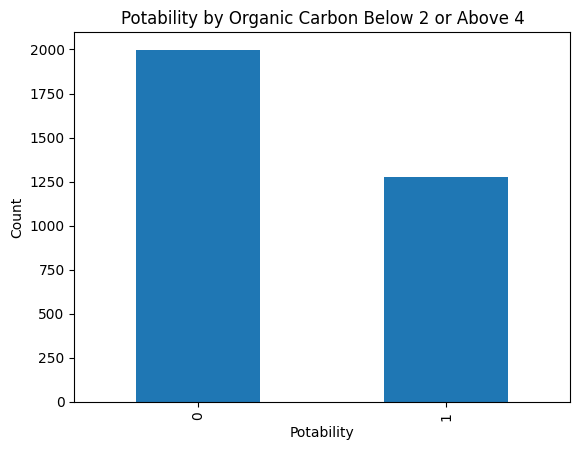

In [ ]:
# potability by ph below/above threshold
over_oc['potability'].value_counts().plot.bar()
plt.title("Potability by Organic Carbon Below 2 or Above 4")
plt.xlabel("Potability")
plt.ylabel("Count")
print(over_oc['potability'].value_counts(), over_oc.shape[0])

**Organic Carbon Below/Above Threshold Analysis:** In terms of organic carbon, about 99% of the data points (3,275 records) are either below the 2.0 or above the 4.0 threshold set by the WHO. About 61% are not potable and 39% are potable.

**Overall Threshold Insight:**  It is evident that many factors go into determining water potability as over a third of samples that exceed these thresholds are still labeled as potable.

#### ph Binning

In [ ]:
# binning pH for further EDA
dfph = df.copy()
dfph['ph_level'] = pd.cut(df['ph'], bins=[0, 6.5, 8.5, 14], labels=['acidic', 'neutral', 'alkaline'])
dfph.head()

ph    hardness        solids  chloramines     sulfate  conductivity  \
0  6.746642  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  334.506495    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  321.768097    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   organic_carbon  trihalomethanes  turbidity  potability  ph_level  
0       10.379783        86.990970   2.963135           0   neutral  
1       15.180013        56.329076   4.500656           0    acidic  
2       16.868637        66.420093   3.055934           0   neutral  
3       18.436524       100.341674   4.628771           0   neutral  
4       11.558279        31.997993   4.075075           0  alkaline

Text(0.5, 1.0, 'pH Count')

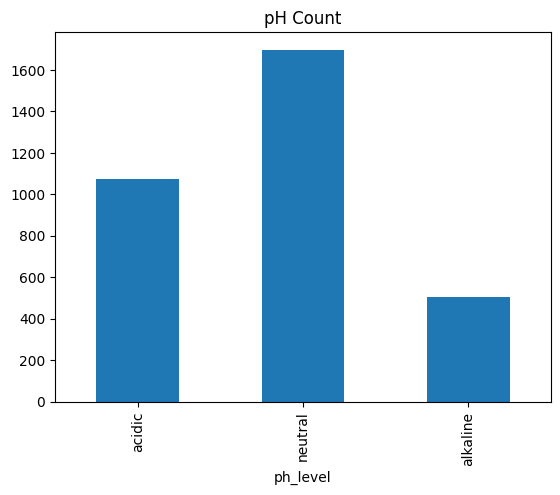

In [ ]:
ph = dfph.groupby('ph_level').agg('count')['potability']
ph.plot.bar()
plt.title("pH Count")

In [ ]:
# ph count
ph

ph_level
acidic      1074
neutral     1697
alkaline     504
Name: potability, dtype: int64

**Binned pH Plot Insight:** About 52% of the pH levels in the dataset are classified as neutral with a count of 1,697.

#### Additional EDA for Target Variable

In [ ]:
# potability by mean features
avg_potability = df.groupby('potability').agg('mean').reset_index()

Text(0.5, 1.0, 'Average pH by Potability')

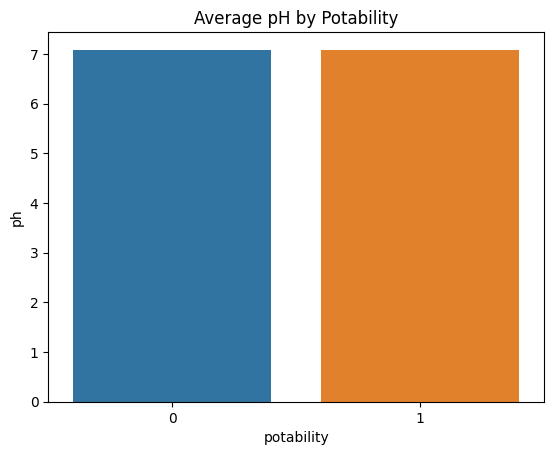

In [ ]:
# solids barplot
sns.barplot(data=avg_potability, x='potability', y='ph')
plt.title("Average pH by Potability")

**Barchart insight:** The difference in average pH between potable and not potable is very small.

In [ ]:
# average features by potability
avg_potability

potability        ph    hardness        solids  chloramines     sulfate  \
0           0  7.076789  196.733292  21777.490788     7.092175  334.530322   
1           1  7.084746  195.800744  22383.991018     7.169338  332.732066   

   conductivity  organic_carbon  trihalomethanes  turbidity  
0    426.730454       14.364335        66.381944   3.965800  
1    425.383800       14.160893        66.590789   3.968328

**Potability by Mean Features Insight:** The mean differences between all the features and the potability target column are very small, possibly indicating that there are other factors at play not captured by the dataset that contribute to the potability of water and/or that it takes an amalgamation of combined metrics to determine potability. It cannot be measured by just one or two variables; otherwise, a starker difference between the means would be apparent. For example, the mean for pH in terms of not potable is 7.076789 while for potable it is 7.084746 for a total difference of only 0.007957. Both means are also still within the acceptable WHO threshold of 6.5-8.5.

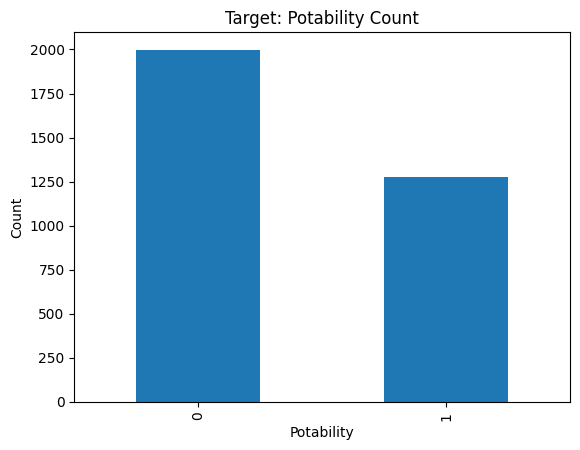

In [ ]:
# target variable: potability count
df['potability'].value_counts().plot.bar()
plt.title("Target: Potability Count")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.show()

In [ ]:
# percentage of imbalance/no information rate
print(df['potability'].value_counts())
print(round(df['potability'].value_counts()/df.shape[0]*100,1))

potability
0    1998
1    1278
Name: count, dtype: int64
potability
0    61.0
1    39.0
Name: count, dtype: float64


**Barplot analysis:** There is an imbalance in the target variable with not potable at 61% (1998) and potable at 39% (1278). Imbalance will be addressed in the data preprocessing step through boostrapping. The no information rate of our majority class is 61%.

# Data Preprocessing

#### Features, Target

In [ ]:
# seperate features from target
X = df.drop('potability', axis=1)
y = df['potability']

#### Splitting Data

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Scaling Features

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Bootstrapping

In [ ]:
# bootstrapping
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Machine Learning Model Building & Evaluation

### KNN Model

In [ ]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# hyperparameters dictionary
hyperparameters = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                   'weights': ['uniform', 'distance'],
                   'p': [1, 2]}

# GridSearchCV
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(knn, hyperparameters, scoring='accuracy', n_jobs=-1)

# GridSearchCV to data
gs.fit(X, y)

# best estimator, best parameters, and best score
print("Best Estimator:", gs.best_estimator_)
print("Best Parameters:", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Estimator: KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')
Best Parameters: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Best Score: 0.5866933531930739


In [ ]:
# Initialize the model with the best hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')
# Fit the model
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')

In [ ]:
# Assess performance on the training and test sets
print(f'Train score: {knn_model.score(X_train, y_train)}')
print(f'Test score: {knn_model.score(X_test, y_test)}')

Train score: 1.0
Test score: 0.6288156288156288


**Insight:** Severe overfitting with KNN model as the train score of 1 is higher than the test score of 0.63.

#### KNN Model Evaluation

In [ ]:
# import evaluation metrics
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Predict
ypred_knn = knn_model.predict(X_test)

In [ ]:
# Evaluation of accuracy
print("Accuracy Score: ", accuracy_score(y_test, ypred_knn))
print(classification_report(y_test, ypred_knn))

Accuracy Score:  0.6288156288156288
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       510
           1       0.51      0.55      0.53       309

    accuracy                           0.63       819
   macro avg       0.61      0.61      0.61       819
weighted avg       0.64      0.63      0.63       819



**KNN Evaluation:** The KNN model has a 62.88% accuracy rate. The model has a higher recall rate for potable at 0.55 than precision rate at 0.51. The f1-score for potable is 0.53. The model does slightly better than the no information rate of 61%.

In [ ]:
# import yellowbrick.classifier
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport

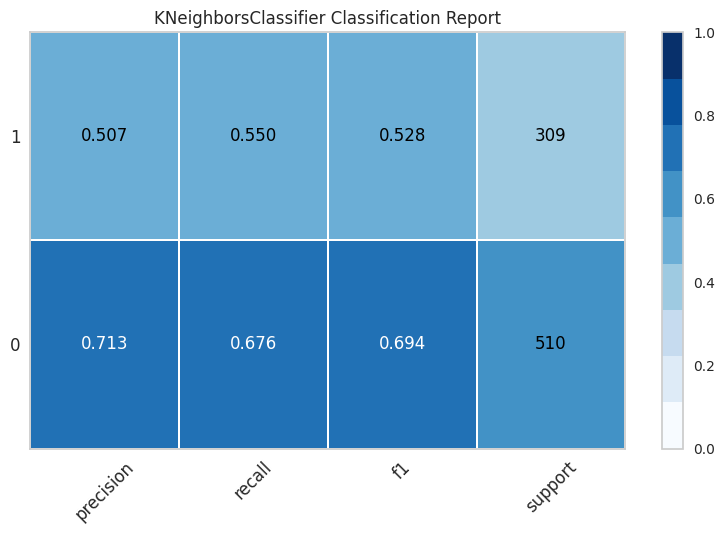

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [ ]:
# visualization of precision, recall, support, and f1 scores using Yellowbrick
knn_report = ClassificationReport(knn_model, classes=[0,1], support=True, cmap='Blues')
knn_report.score(X_test, y_test)
knn_report.show()

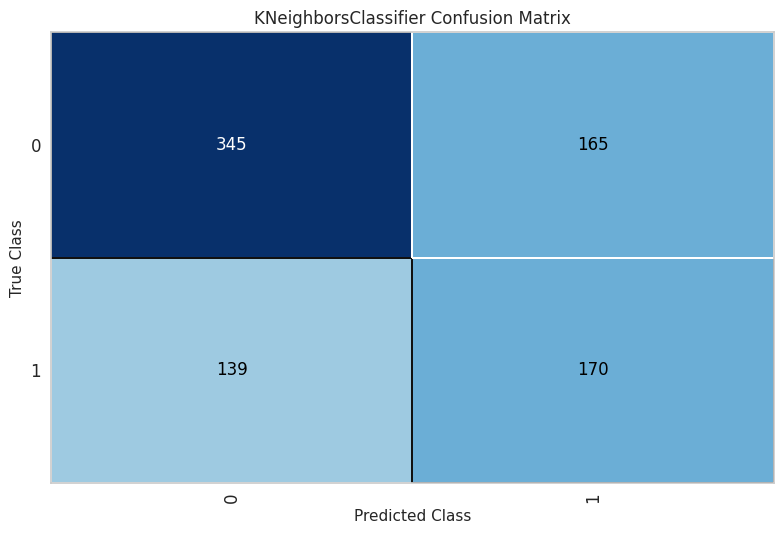

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# confusion matrix
knn_cm = ConfusionMatrix(knn_model, classes=[0,1], cmap='Blues')
knn_cm.score(X_test, y_test)
knn_cm.show()

**KNN Confusion Matrix:** The model has 139 false positives, 165 false negatives, 170 true positives, and 345 true negatives.

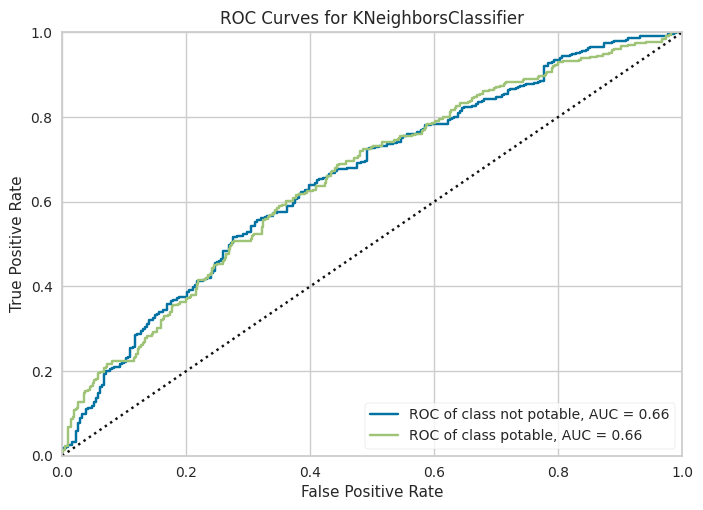

In [ ]:
# plot the ROC AUC for KNN
from yellowbrick.classifier.rocauc import roc_auc
roc = roc_auc(knn_model,
              X_train,
              y_train,
              X_test,
              y_test,
              classes=['not potable', 'potable'],
              macro=False,
              micro=False)

**KNN AUC Score and ROC Curve Insight:** The KNN model does a fair job at distinguishing between classess of not potable and potable water with an AUC score of 0.66.

### Logistic Regression Model

In [ ]:
# import the logistic regressor model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# hyperparameters dictionary
hyperparameters2 = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                   'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                   'C': [100, 10, 1.0, 0.1, 0.01]}

# GridSearchCV
gslog = GridSearchCV(logreg, hyperparameters2, scoring='accuracy', n_jobs=-1)

# GridSearchCV of data
gslog.fit(X, y)

# best estimator, best parameters, and best score
print("Best Estimator:", gslog.best_estimator_)
print("Best Parameters:", gslog.best_params_)
print("Best Score:", gslog.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best Estimator: LogisticRegression(C=100, penalty='none')
Best Parameters: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
Best Score: 0.6101954943213554


/opt/conda/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skl

In [ ]:
# sklearn logistic regression
log_model = LogisticRegression(C=100, penalty='none', solver='newton-cg')
log_model.fit(X_train, y_train)

LogisticRegression(C=100, penalty='none', solver='newton-cg')

In [ ]:
# Assess performance on the training and test sets
print(f'Train score: {log_model.score(X_train, y_train)}')
print(f'Test score: {log_model.score(X_test, y_test)}')

Train score: 0.511760752688172
Test score: 0.5164835164835165


**Insight:** No evidence of overfitting since the train and test scores are comparable.

#### Logistic Regression Evaluation

In [ ]:
# predictions
log_pred = log_model.predict(X_test)

In [ ]:
# evaluation of accuracy
print("Accuracy Score: ", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))

Accuracy Score:  0.5164835164835165
              precision    recall  f1-score   support

           0       0.63      0.54      0.58       510
           1       0.39      0.49      0.43       309

    accuracy                           0.52       819
   macro avg       0.51      0.51      0.51       819
weighted avg       0.54      0.52      0.52       819



**Logistic Regression Evaluation:** The Logistic Regression model has a lower accuracy rate at 51.65% than the KNN model at 62.88%. For potable water, the precision rate is 0.39 and for recall it is 0.49. The f1-score is also lower than the KNN model at 0.43. The model does worse than the no information rate of 61%.

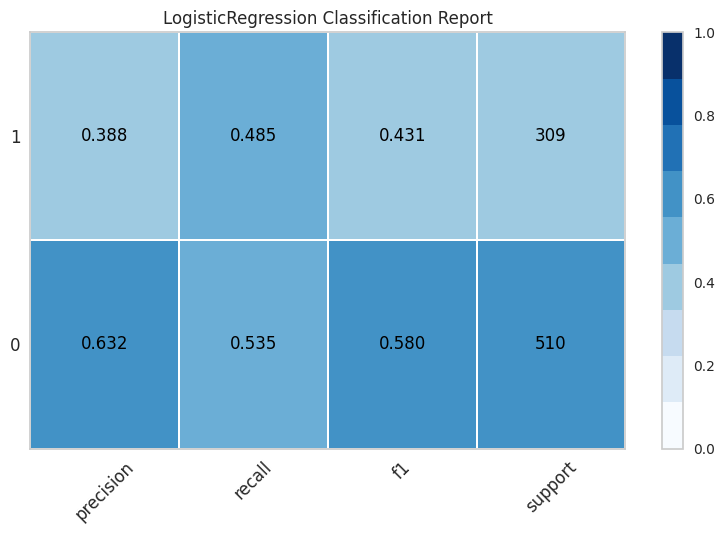

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [ ]:
# visualization of precision, recall, support, and f1 scores using Yellowbrick
log_report = ClassificationReport(log_model, classes=[0,1], support=True, cmap='Blues')
log_report.score(X_test, y_test)
log_report.show()

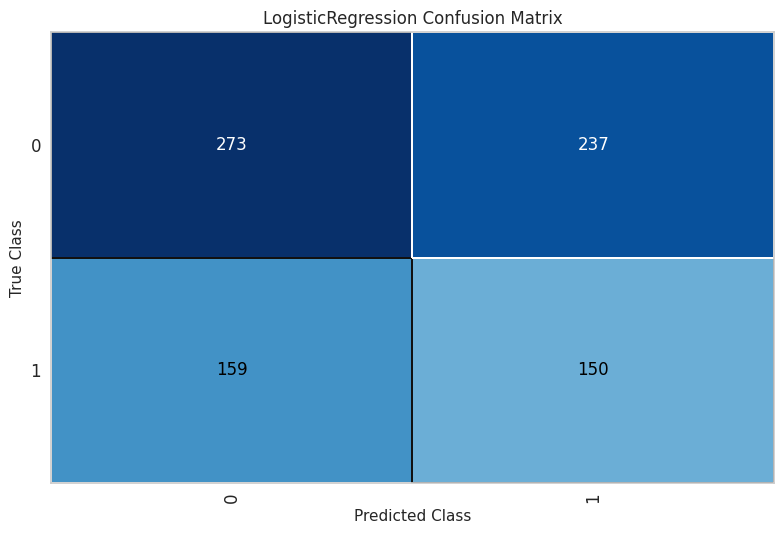

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# confusion matrix
log_cm = ConfusionMatrix(log_model, classes=[0,1], cmap='Blues')
log_cm.score(X_test, y_test)
log_cm.show()

**Logistic Regression Confusion Matrix:** The model has a lot of Type I and Type II errors with almost half of the target class incorrectly labeled. The model has 159 false positives, 237 false negatives, 150 true positives, and 273 true negatives.

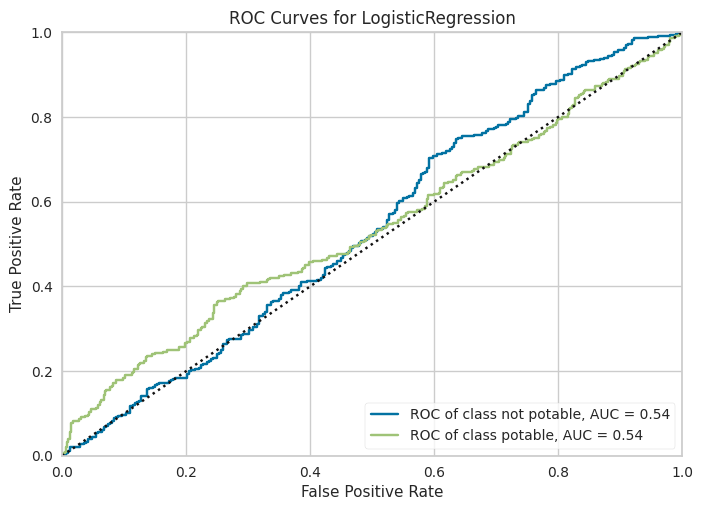

In [ ]:
# plot the ROC AUC for logistic regression
from yellowbrick.classifier.rocauc import roc_auc
roc = roc_auc(log_model,
              X_train,
              y_train,
              X_test,
              y_test,
              classes=['not potable', 'potable'],
              macro=False,
              micro=False)

**Logistic Regression AUC Score and ROC Curve Insight:** The logistic regression model does no better than random guessing at correctly distinguishing between true positives and false positives with an AUC score of 0.54.

### Gradient Boosting Classifier

In [ ]:
# import the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

# hyperparameters dictionary
hyperparameters3 = {'n_estimators': [10, 100, 250],
                   'learning_rate': [0.001, 0.01, 0.1],
                   'subsample': [0.5, 0.7, 0.9],
                   'max_depth': [3, 7, 9, 11]}

# GridSearchCV
gsgbc = GridSearchCV(gbc, hyperparameters3, scoring='accuracy', n_jobs=-1)

# GridSearchCV of data
gsgbc.fit(X, y)

# best estimator, best parameters, and best score
print("Best Estimator:", gsgbc.best_estimator_)
print("Best Parameters:", gsgbc.best_params_)
print("Best Score:", gsgbc.best_score_)

Best Estimator: GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=250,
                           random_state=42, subsample=0.7)
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 250, 'subsample': 0.7}
Best Score: 0.6437846769689071


In [ ]:
# gradient boosting ensemble model
gbc_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=250,
                           random_state=42, subsample=0.7)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=250,
                           random_state=42, subsample=0.7)

In [ ]:
# Assess performance on the training and test sets
print(f'Train score: {gbc_model.score(X_train, y_train)}')
print(f'Test score: {gbc_model.score(X_test, y_test)}')

Train score: 0.9408602150537635
Test score: 0.6886446886446886


**Insight:** Overfitting is present with the Gradient Boosting Classifier as the train score is higher than the test score.

#### Gradient Boosting Classifier Evaluation

In [ ]:
# predictions
gbc_pred = gbc_model.predict(X_test)

In [ ]:
# Evaluation of accuracy
print("Accuracy Score: ", accuracy_score(y_test, gbc_pred))
print(classification_report(y_test, gbc_pred))

Accuracy Score:  0.6886446886446886
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       510
           1       0.61      0.48      0.54       309

    accuracy                           0.69       819
   macro avg       0.67      0.65      0.65       819
weighted avg       0.68      0.69      0.68       819



**Gradient Boosting Classifier Evaluation:** Compared to Logistic Regression at 51.65% and KNN at 62.88%, the Gradient Boosting Classifier model has the highest accuracy score at 68.62%. The model does better than the no information rate of 61%. The model has a higher precision rate of 0.60 than recall at 0.49 for potable water. The model does particularly well at both precision and recall for not potable water at scores of 0.72 and 0.80 respectively. The f1-score for potable water is 0.54.

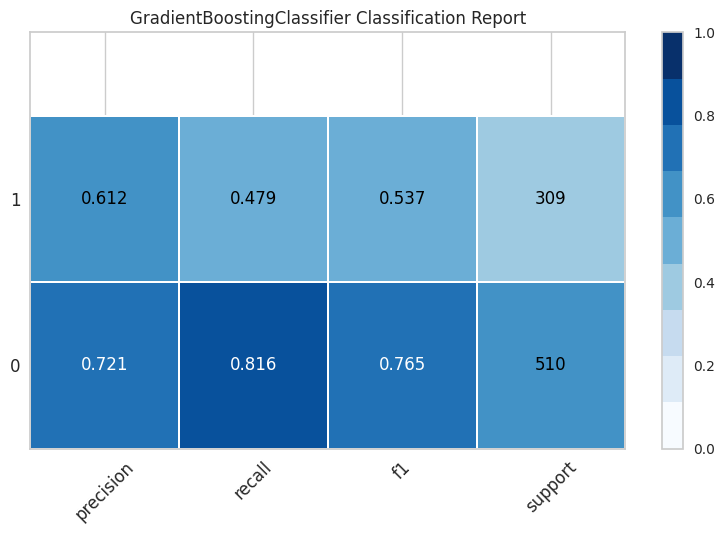

<Axes: title={'center': 'GradientBoostingClassifier Classification Report'}>

In [ ]:
# visualization of precision, recall, support, and f1 scores using Yellowbrick
gbc_report = ClassificationReport(gbc_model, classes=[0,1,2], support=True, cmap='Blues')
gbc_report.score(X_test, y_test)
gbc_report.show()

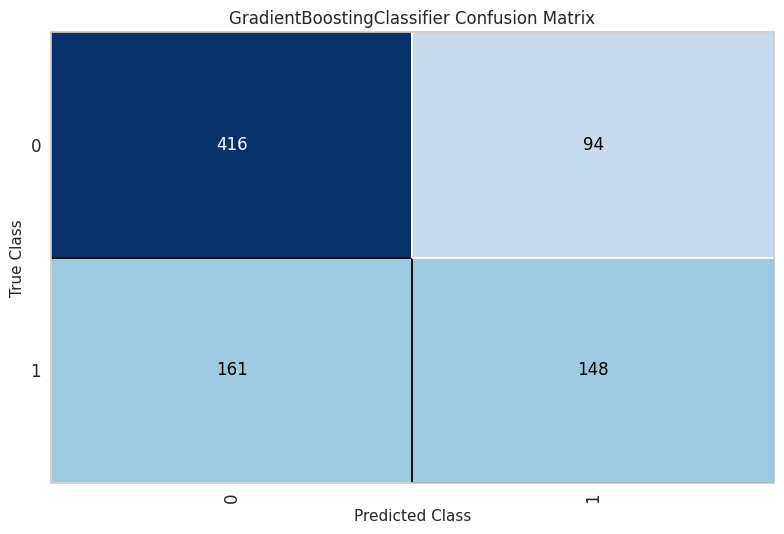

<Axes: title={'center': 'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# confusion matrix
gbc_cm = ConfusionMatrix(gbc_model, classes=[0,1], cmap='Blues')
gbc_cm.score(X_test, y_test)
gbc_cm.show()

**Gradient Boosting Classifier Confusion Matrix:** The model has 152 true positives, 410 true negatives, 100 false negatives, and 157 false positives.

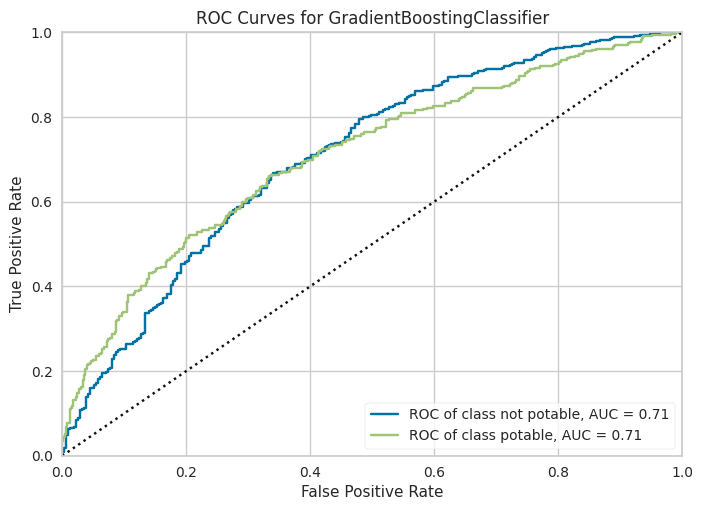

In [ ]:
# plot the ROC AUC for the gradient boosting classifier
from yellowbrick.classifier.rocauc import roc_auc
roc = roc_auc(gbc_model,
              X_train,
              y_train,
              X_test,
              y_test,
              classes=['not potable', 'potable'],
              macro=False,
              micro=False)

**GBC AUC Score and ROC Curve Insight:** Since the ROC curve is to the left and above the dashed line, the Gradient Boosting model does better than random guessing at correctly classifying water potability. The AUC score of 0.71 is the highest out of all the models, which means it correctly distinguishes between true positives and false positives at a more accurate rate than the other models.

# Conclusion

 From a health safety standard, a model that leads to a higher AUC score and higher precision score is a more important measure of potability than recall or accuracy as it aims to reduce the number of false positives, leading to less cases of water being incorrectly labeled as safe for consumption.